In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px


import matplotlib.pyplot as plt
import os

# Требования: 
- во всех графиках должны быть подписи чере title, legend, etc... 
- Убедитесь, что после сохранения ноутбука графики всё ещё видно, если открыть ноутбук заново, если не видно, то напишите мне @kirizhik 
- Можно баловаться с цветами, чтобы было **K P A C U B O**, но **не вырвеглазно**, пожалуйста

In [3]:
df = pd.read_csv('data.csv', index_col = 0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [4]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [91]:
df.head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


# Заполните пропуски в утверждениях 

- В датасете [88] переменных

- Из них числовых [43]

# Изучите распределение возростов с помощью Age [px.histogram](https://plotly.com/python/histograms/), изучите [более продвинутые методы](https://plotly.com/python/distplot/) визуализации распределений 

In [155]:
# Ваш код красивый и самый лучший сюда
counts, bins = np.histogram(df['Age'], bins=range(16, 45, 1))

fig = px.bar(x=bins[:-1], y=counts, title='Возраст игроков',  labels=dict(x='Возраст', y='Кол-во игроков'))

fig.show()

# Визуализируйте соотношенеие между левшами и правшами (? сами найдите необходимую колонку в данных, считаем, что левша-правша ~ предпочтительная нога для ударов )

In [140]:
# Ваш гениальный код сюда
tmp = df['Preferred Foot'].value_counts().to_frame()
tmp['Foot'] = tmp.index

fig = px.pie(tmp, values='Preferred Foot', names='Foot', width=700).update_layout(
    title='Распределение игроков по "сильной ноге"'
)
fig.show()

# Визуализируйте Международный Рейтинг футболистов (International Reputation), ассоциирован ли он с национальностью? футбольным клубом? 

![Игроки](Players.png "Title")


In [97]:
# ну сами понимаете...

px.histogram(df, x='International Reputation').update_layout(
    title='Распределение игроков по рейтингу', yaxis_title='Кол-во игроков', xaxis_title='Международный рейтинг'
)

In [157]:
temp_df = df.groupby('Nationality', as_index=False)['International Reputation'].mean()
fig = px.bar(temp_df, x='Nationality', y='International Reputation', width=1200, height=600).update_layout(
    title='Среднее значение рейтинга у игроков из разных стран', yaxis_title='Среднее значение рейтинга', xaxis_title='Национальность'
)

fig.update_xaxes(tickangle=-45)

In [7]:
temp_df = df.groupby('Club', as_index=False)['International Reputation'].mean()

# я отброшу все клубы с низким средним рейтингом, т.к. они очень сильно засоряют график
print(temp_df.quantile(0.75))
temp_df = temp_df[temp_df['International Reputation'] >= 1.1]
# всего у 25% процентов клубов средняя репутация больше 1.1

fig = px.bar(temp_df, x='Club', y='International Reputation', width=1200, height=600).update_layout(
    title='Среднее значение рейтинга у игроков из разных клубов', yaxis_title='Среднее значение рейтинга', xaxis_title='Клуб'
)
fig.update_xaxes(tickangle=-45)

fig.show()

International Reputation    1.1
Name: 0.75, dtype: float64


### Международный рейтинг скорее ассоцирован с клубом, чем со страной. На графиках видно, что самые большие средние показатели рейтинга у стран, где мало игроков. А вот клубы являются очень хорошими показателями. Только 25% клубов может похвастаться средним рейтингом больше 1.1. В топовых клубах средний рейтинг почти достигает 2

# Есть ли зависимость между потенциалом (Potential) и Международным Рейтингом футболистов (International Reputation)? Визуализируте её. Влияет ли на потенциал игровая нога? Почему так может случиться? (картинка в тему)

![Коазуация или корреляция?](causuation.png "???")

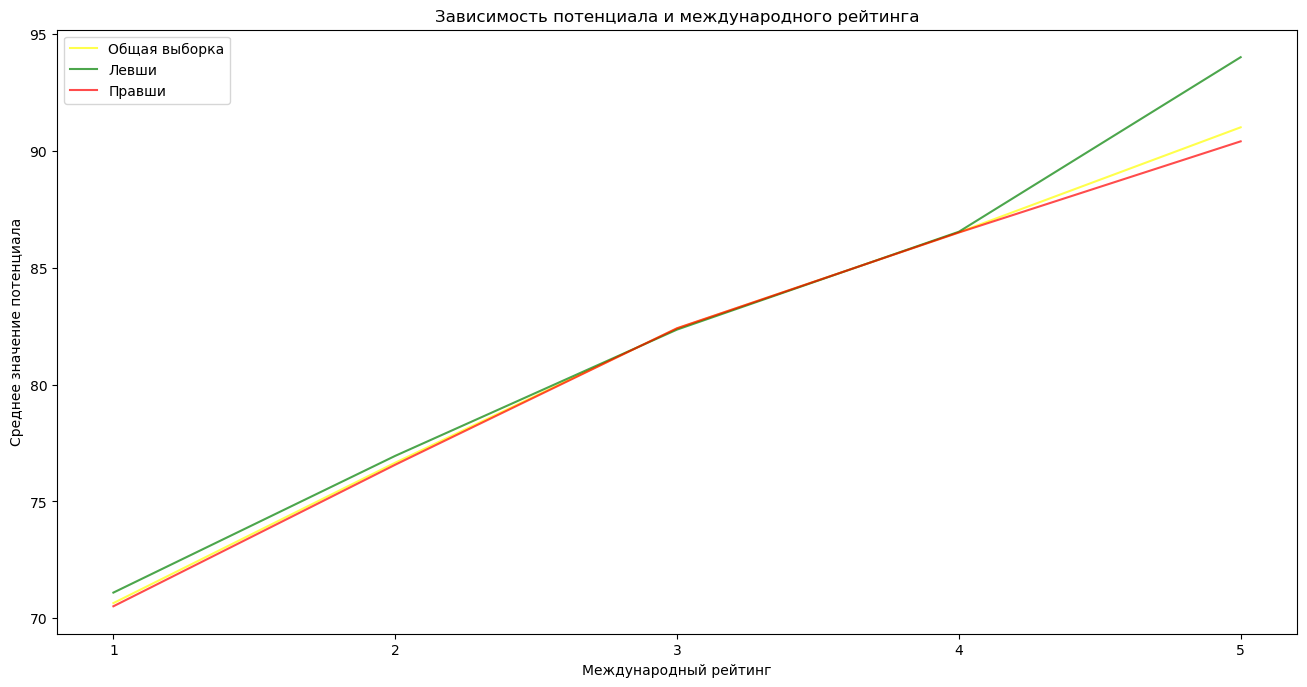

In [159]:
# 🤔 угадайте что
plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df.groupby('International Reputation')['Potential'].mean(), color='yellow', alpha=.7)
plt.plot(df[df['Preferred Foot'] == 'Left'].groupby('International Reputation')['Potential'].mean(), color='green', alpha=.7)
plt.plot(df[df['Preferred Foot'] == 'Right'].groupby('International Reputation')['Potential'].mean(), color='red', alpha=.7)
plt.xticks([1, 2, 3, 4,5])

plt.title('Зависимость потенциала и международного рейтинга')
plt.legend(['Общая выборка', 'Левши', 'Правши'])
plt.ylabel('Среднее значение потенциала')
plt.xlabel('Международный рейтинг')

plt.show()

### Между потенциалом и международным рейтингом есть прямая завимость.
### Разница между правшами и левшами появляется только из-за выборки. Рейтинг 4 и 5 имеют только около 60 игроков, этого недостаточно, чтобы говорить о взаимосвязи

# Теперь пройдёмся по показателям игроков... 
### Есть ли зависимость Выносливости (Stamina) и Силы (Strength) игроков? какая? точно зависимость? 


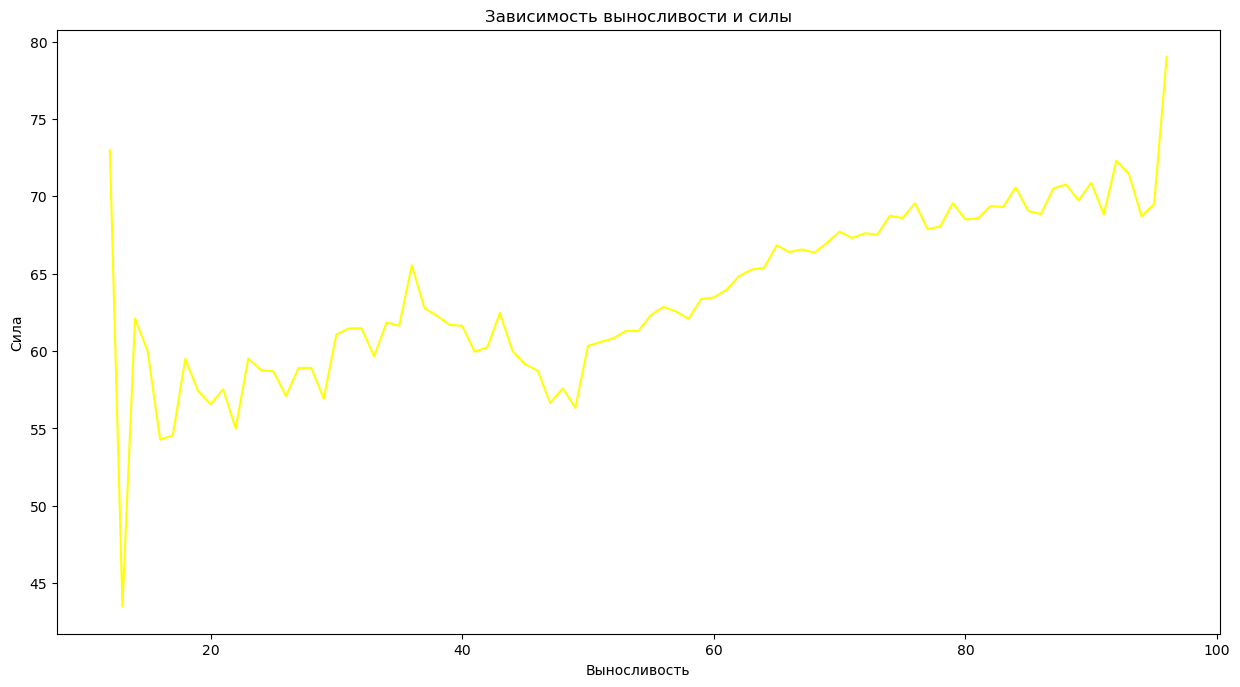

In [360]:
plt.figure(figsize=(15, 8), dpi=100)
plt.plot(df.groupby('Stamina')['Strength'].mean(), color='yellow')
plt.title('Зависимость выносливости и силы')
plt.xlabel('Выносливость')
plt.ylabel('Сила')
plt.show()

### Между выносливостью есть взаимосвязь, об этом можно судить по графику. Выбросы в концах прямой являются аномалиями, которые являются исключениями, а не правилом

# Зависит ли Стоимость игрока стоимость (Value) игрока от его "финтов" (Skill Moves)?

In [160]:
def get_correct_value(s):
    if s[-1] == 'K':
        return float(s[1:-1]) * 1e3
    elif s[-1] == 'M':
        return float(s[1:-1]) * 1e6
    else:
        return float(s[1:])


df['Correct Value'] = df['Value'].apply(get_correct_value)
# df['Skill Moves'].dtype
px.histogram(df, x='Correct Value', y='Skill Moves', histfunc='avg', range_x=[1, 120 * 1e6], nbins=70).update_layout(
    title='Среднее значение "финтов" в зависимости от стоимости игрока', yaxis_title='Среднее значение "финтов"', xaxis_title='Стоимость'
)

### Здесь можно судить не столько о зависимости стоимости и финтов, сколько о том, что среди "дорогих" игроков больше нападающих и полузащитников, которые из-за своей роли обязаны иметь хорошие "финты".

# Покажите распределеняи основных характеристик игроков: Рост, Вес, Возраст по позициям (Position), сделайте выводы...


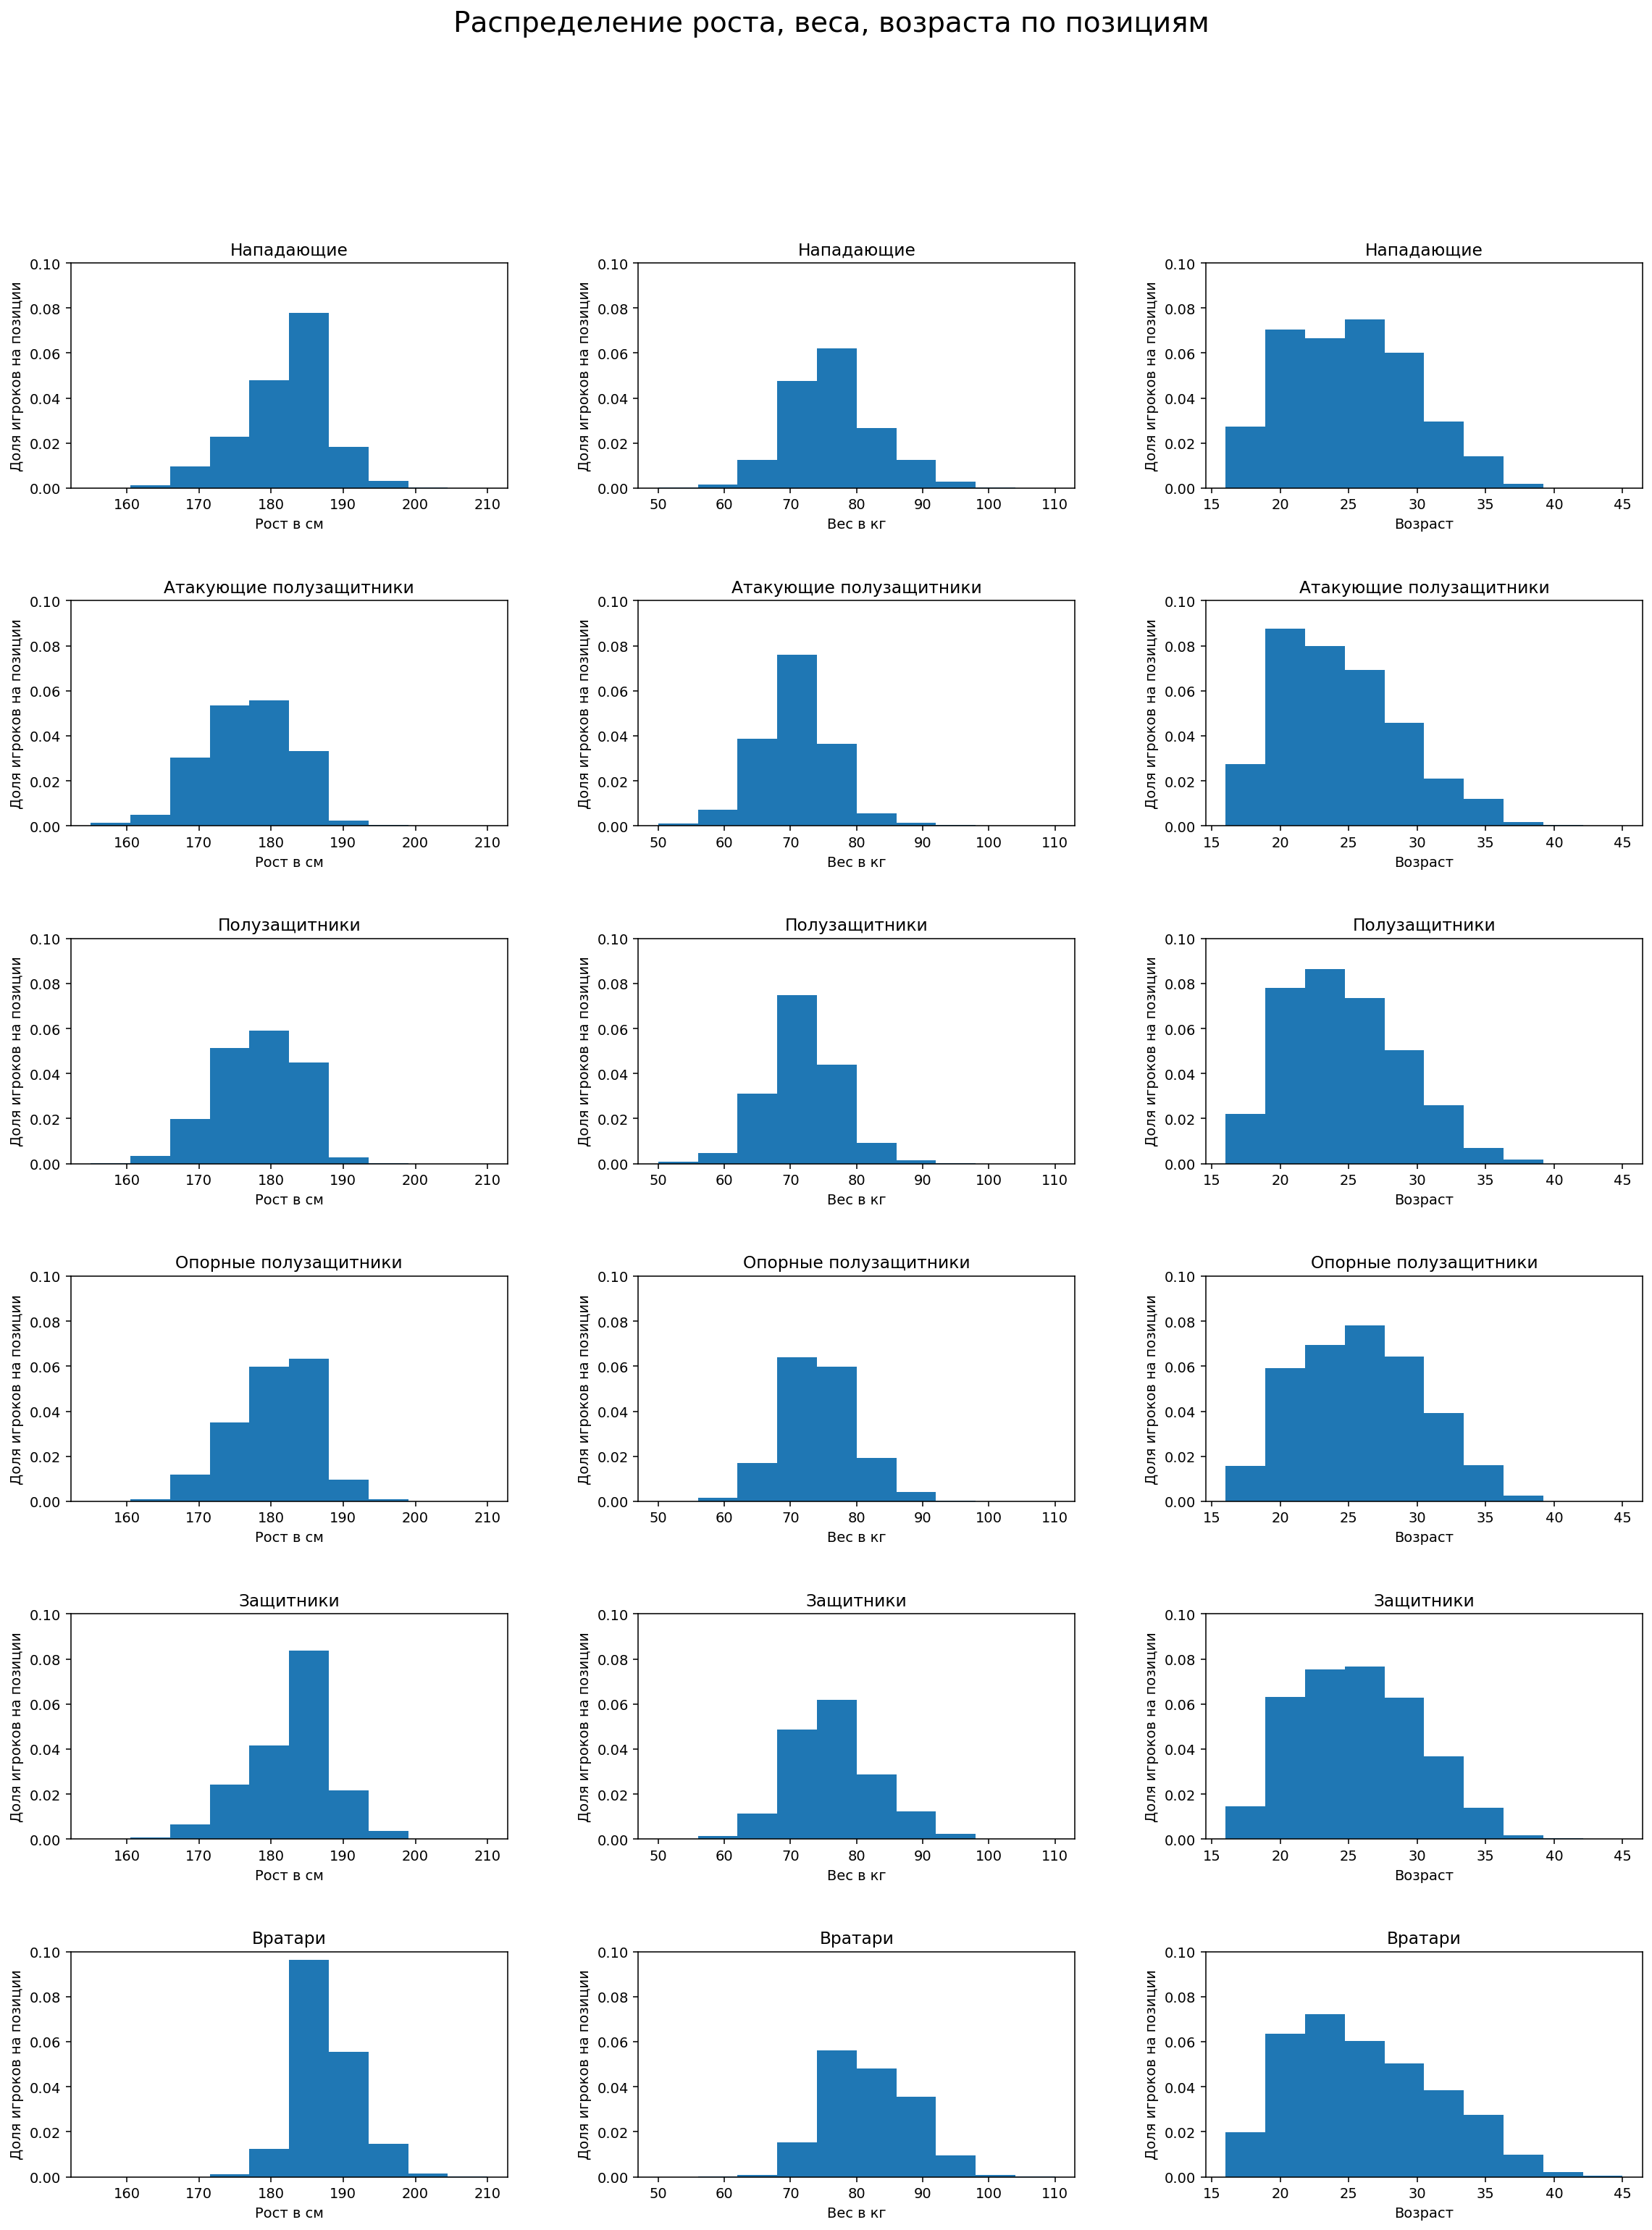

In [161]:
# ...
def convert_height_to_cm(height):
    feets, inches = map(int, str(height).split("'"))
    # print(feets, inches)
    return feets * 30.48 + inches * 2.54

def convert_weight_to_kg(weight):
    lbs = int(str(weight)[:-3])
    return lbs / 2.205

forwards = ['ST', 'LS', 'RS', 'RF', 'LF', 'CF']
attacking_midfielders = ['CAM', 'LAM', 'RAM', 'LW', 'RW']
midfielders = ['CM', 'RM', 'LM', 'LCM', 'RCM']
defending_midfielders = ['CDM', 'RDM', 'LDM', 'LWB', 'RWB']
defenders = ['CB', 'LB', 'RB', 'RCB', 'LCB']
goalkeepers = ['GK']

df['Height cm'] = df['Height'].dropna().apply(convert_height_to_cm)
df['Weight kg'] = df['Weight'].dropna().apply(convert_weight_to_kg)
fig, axs = plt.subplots(6, 3, figsize=(20, 25), dpi=140)


def show_all_plots(column, col_range=None):
    parameter = ['Height cm', 'Weight kg', 'Age']
    title_text = ['Рост в см', 'Вес в кг', 'Возраст']
    positions = [forwards, attacking_midfielders, midfielders, defending_midfielders, defenders, goalkeepers]
    positions_names = ['Нападающие', 'Атакующие полузащитники', 'Полузащитники', 'Опорные полузащитники', 'Защитники', 'Вратари']

    for i in range(6):
        axs[i, column].hist(df[df['Position'].isin(positions[i])][parameter[column]], range=col_range, density=True)
        axs[i, column].set_ylim([0, 0.1])
        axs[i, column].set_ylabel('Доля игроков на позиции')
        axs[i, column].set_xlabel(title_text[column])
        axs[i, column].set_title(positions_names[i])

fig.suptitle('Распределение роста, веса, возраста по позициям', fontsize=20)

show_all_plots(0, [155, 210])
show_all_plots(1, [50, 110])
show_all_plots(2, [16, 45])

plt.subplots_adjust(hspace=0.5, wspace=0.3)

### Вратари являются лидерами во всех показателях. Лидерство в росте объяснять не надо(ну "раму" закрывать им надо как бы). Т.к у них меньшие требования к постоянным нагрузкам они так же в среднем тяжелее и старше
### Самыми молодыми, "лёгкими" и низкими оказались атакующие полузашитники. Это может быть следствием того, что им требуется скорость.

# Есть ли зависимость скорости (SprintSpeed) от веса и роста? А от национальности?  

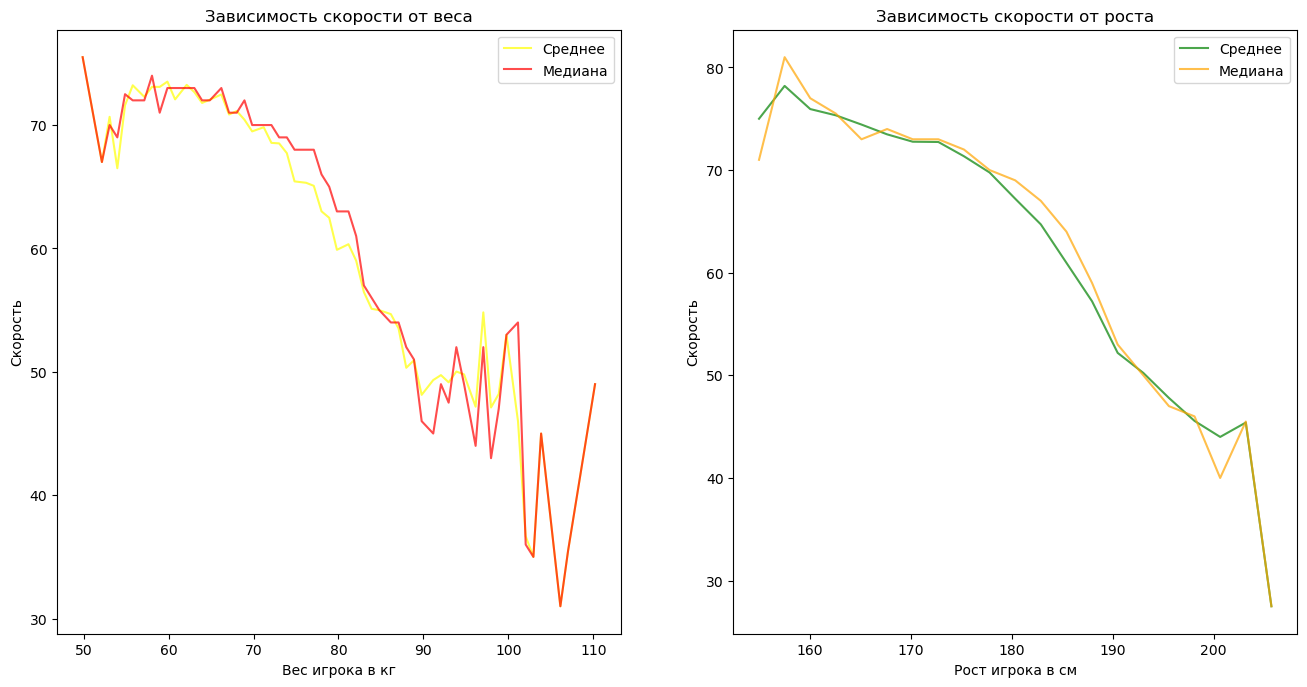

In [163]:
# сбда писатб
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), dpi=100)
# plt.figure()
ax1.plot(df.groupby('Weight kg')['SprintSpeed'].mean(), color='yellow', alpha=.7)
ax1.plot(df.groupby('Weight kg')['SprintSpeed'].median(), color='red', alpha=.7)
ax1.set_title('Зависимость скорости от веса')
ax1.legend(['Среднее', 'Медиана'])
ax1.set_xlabel('Вес игрока в кг')
ax1.set_ylabel('Скорость')
# plt.show()

# plt.figure(figsize=(10, 5), dpi=100)
ax2.plot(df.groupby('Height cm')['SprintSpeed'].mean(), color='green', alpha=.7)
ax2.plot(df.groupby('Height cm')['SprintSpeed'].median(), color='orange', alpha=.7)
ax2.set_title('Зависимость скорости от роста')
ax2.legend(['Среднее', 'Медиана'])
ax2.set_xlabel('Рост игрока в см')
ax2.set_ylabel('Скорость')

plt.show()

In [164]:
temp_df = df.groupby('Nationality', as_index=False)['SprintSpeed'].mean()
fig = px.bar(temp_df, x='Nationality', y='SprintSpeed', width=1200, height=600).update_layout(
    title='Средняя скорость у игроков из разных стран', yaxis_title='Средняя скорость', xaxis_title='Национальность'
)

fig.update_xaxes(tickangle=-45)

### С увеличением роста и веса очевидно падает и скорость, при чём достаточно заметно. Среди лидеров по скорости среди национальностей выступают чаще всего африканцы. Это может быть связано с их физиологическими особенностями.

# Под какими номерами чаще всего играют нападающие? Визуализируйте частотность  

In [165]:
# давай-давай
px.histogram(df[df['Position'].isin(forwards)], x='Jersey Number', nbins=100, width=1200, height=600).update_layout(
    title='Кол-во нападающих с определённым номером', yaxis_title='Кол-во игроков', xaxis_title='Номер'
)

# Есть ли за зависимость **силы удара** (ShotPower) от **ведущей ноги**? от **агрессивности** (Aggression)? 


In [166]:
# давай-давай, нападай
px.histogram(df, x='Preferred Foot', y='ShotPower', histfunc='avg').update_layout(
    title='Средняя сила удара у правшей и левшей', yaxis_title='Среднее значение', xaxis_title='Сильная нога'
)

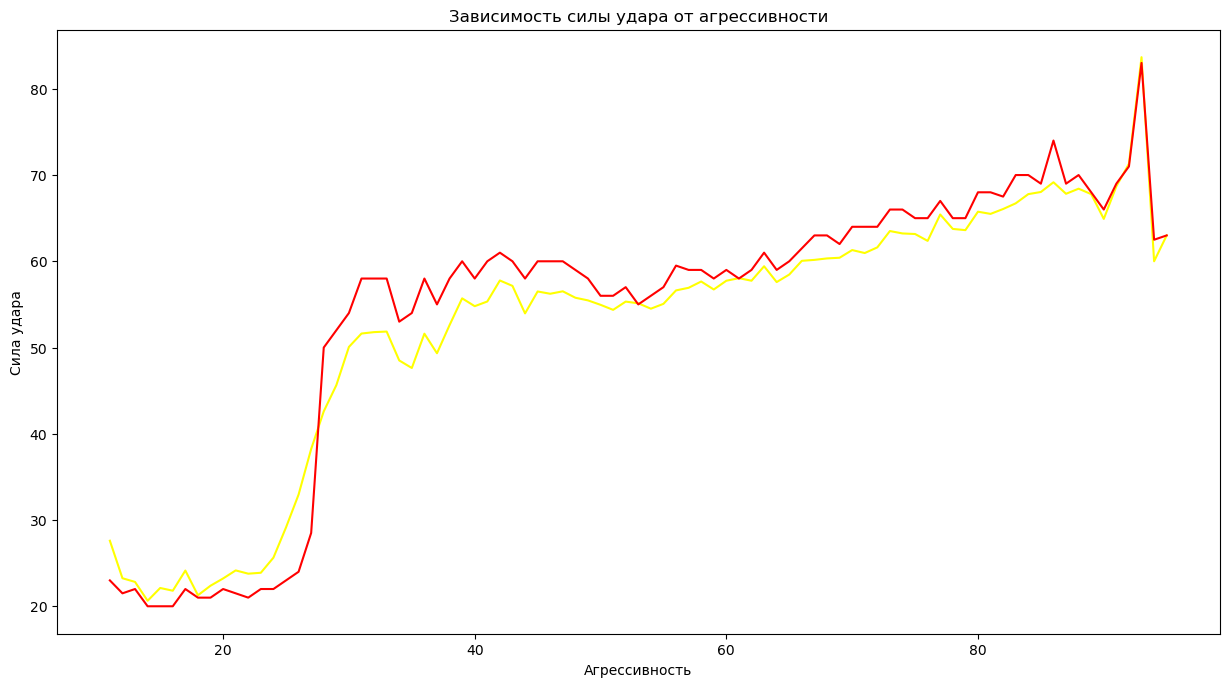

In [167]:
plt.figure(figsize=(15, 8), dpi=100)
plt.plot(df.groupby('Aggression')['ShotPower'].mean(), color='yellow')
plt.plot(df.groupby('Aggression')['ShotPower'].median(), color='red')
plt.title('Зависимость силы удара от агрессивности')
plt.xlabel('Агрессивность')
plt.ylabel('Сила удара')
plt.show()

### Нога не влияет на силу удара, в отличие от агрессивности. С её ростом хоть не на много, но повышается сила удара.

# Найдите суммарную стоимость игроков в каждом клубе. Визуализируйте соотношение сумарной стоимости топ 10 клубов. 

In [168]:
# удачи...
tmp_df = df.groupby('Club', as_index=False)['Correct Value'].sum().sort_values('Correct Value', ascending=False)
fig = px.pie(tmp_df.head(10), values='Correct Value', names='Club', width=1200, height=600).update_layout(
    title='Соотношение суммарной стоимости игроков в топ 10 клубов'
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Есть ли зависимость между продолжительностью контракта игрока и его стоимость? 

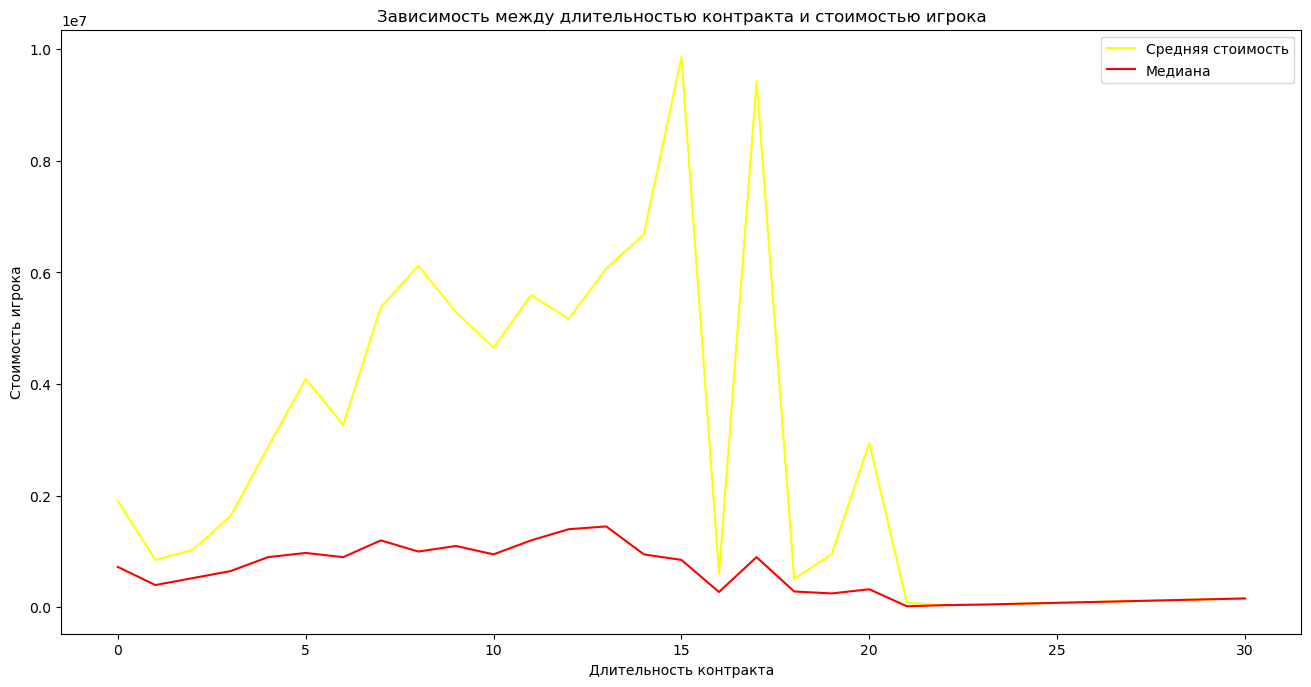

In [169]:
def calculate_contract_duration(f):
    start = f['Joined']
    end = f['Contract Valid Until']
    if start == '-1' or end == '-1':
        return 0
    return int(str(end)[-4:]) - int(str(start)[-4:])

df['Joined'] = df['Joined'].fillna('-1')
df['Contract Valid Until'] = df['Contract Valid Until'].fillna('-1')
df['Contract duration'] = df.apply(calculate_contract_duration, axis=1)
# df['Contract duration'].value_counts()

# px.line(df.sort_values('Contract duration'), x='Contract duration', y='Correct Value', width=1200, height=600)
plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df.groupby('Contract duration')['Correct Value'].mean(), color='yellow')
plt.plot(df.groupby('Contract duration')['Correct Value'].median(), color='red')

plt.title('Зависимость между длительностью контракта и стоимостью игрока')
plt.legend(['Средняя стоимость', 'Медиана'])
plt.ylabel('Стоимость игрока')
plt.xlabel('Длительность контракта')

plt.show()

### Такая разница медианы и среднего говорит о том, что есть несколько "дорогих" игроков с долгими контрактами. Но о зависимости говорить не приходится

# В какой год будет больше всего свободных игроков на рынке (исходя из этих данных)? визуализируйте зависимость 

In [170]:
def get_expiration_year(s):
    if s == '-1':
        return None
    return int(str(s)[-4:])

df['Expiration year'] = df['Contract Valid Until'].apply(get_expiration_year)
px.histogram(df, x='Expiration year', width=1200, height=600).update_layout(
    title='Кол-во контрактов, истекающих в определённый год', yaxis_title='Кол-во контрактов', xaxis_title='Год'
)

# Есть ли зависмость потенциала (Potential) игрока от возраста? Всегда ли молодые игроки обладают большим потенциалом? 

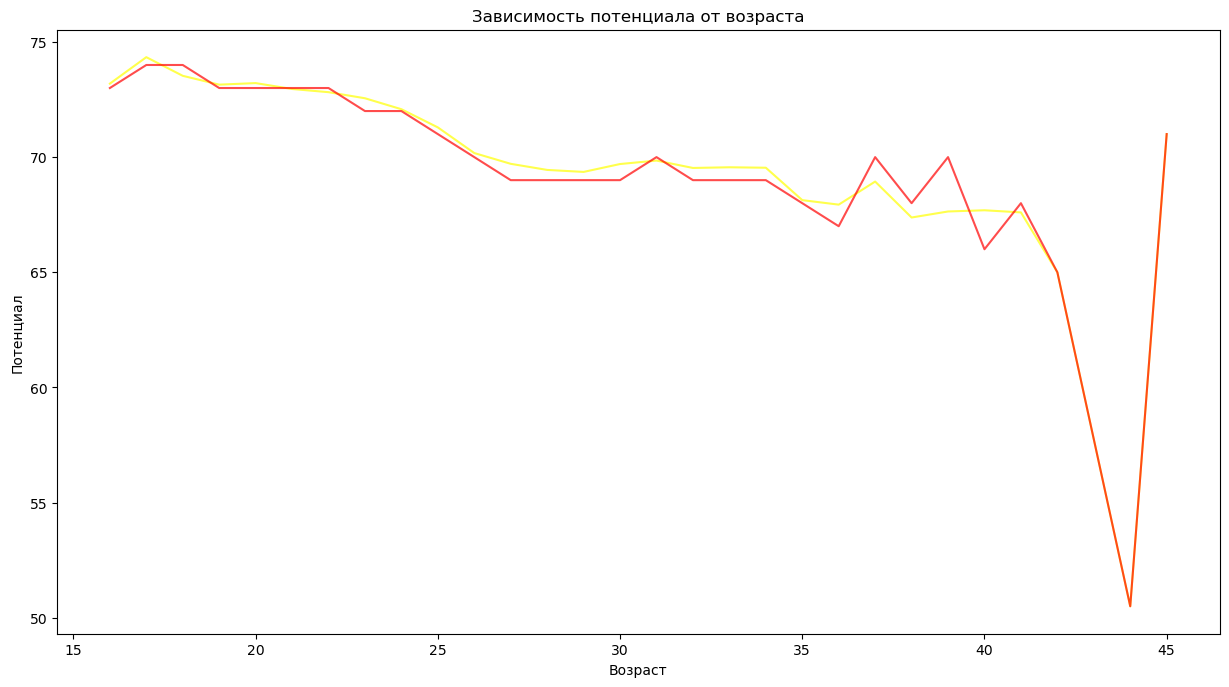

In [171]:
plt.figure(figsize=(15, 8), dpi=100)
plt.plot(df.groupby('Age')['Potential'].mean(), color='yellow', alpha=.7)
plt.plot(df.groupby('Age')['Potential'].median(), color='red', alpha=.7)
plt.title('Зависимость потенциала от возраста')
plt.xlabel('Возраст')
plt.ylabel('Потенциал')
plt.show()

### В большинстве случаев потенциал молодых игроков выше, и с возрастом он уменьшается. Но как всегда есть исключения среди возрастных игроков

# Есть ли зависимость рейтинга игрока (Overall) от возраста? Когда у игроков "пик" карьеры? Игроков какого возраста больше всего с рейтингом 90+?

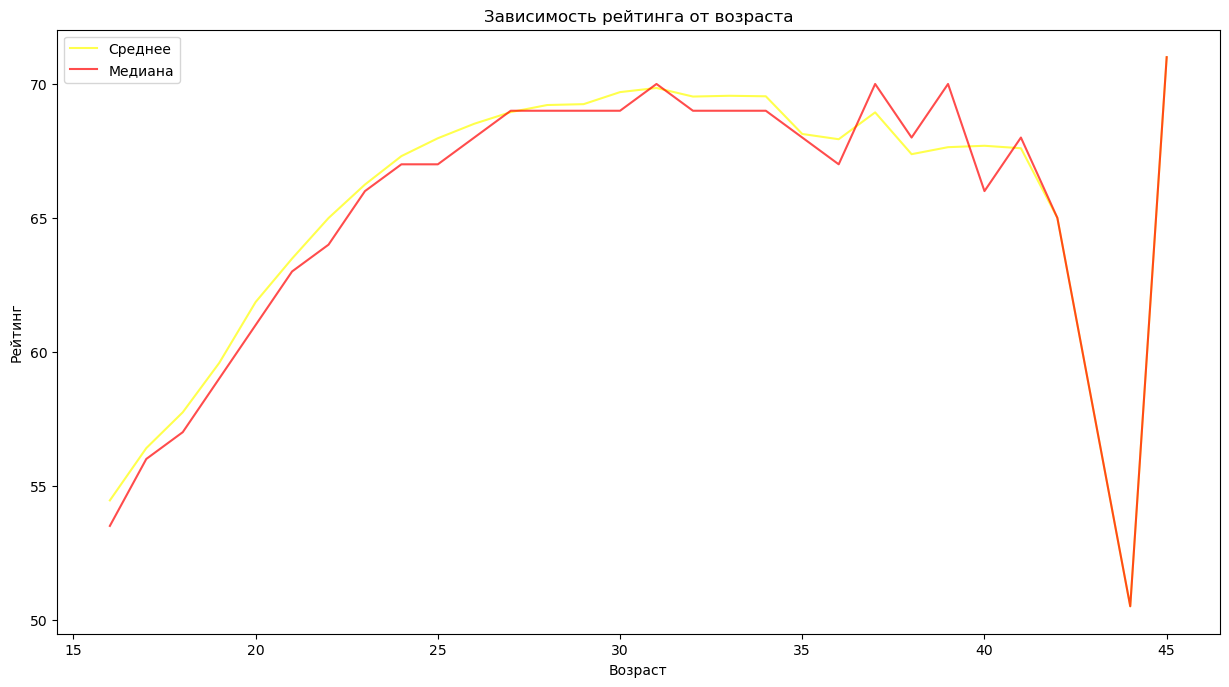

In [172]:
plt.figure(figsize=(15, 8), dpi=100)
plt.plot(df.groupby('Age')['Overall'].mean(), color='yellow', alpha=.7)
plt.plot(df.groupby('Age')['Overall'].median(), color='red', alpha=.7)
plt.legend(['Среднее', 'Медиана'])
plt.title('Зависимость рейтинга от возраста')
plt.xlabel('Возраст')
plt.ylabel('Рейтинг')
plt.show()

### "Пик" карьеры наступает чаще всего в районе 30 лет, после чего начинается падение. Примерно к 40 большая часть завершает карьеру и остаются только единичные "старички".

In [173]:
px.histogram(df[df['Overall'] > 90], x='Age', y='Overall', nbins=10, histfunc='count').update_layout(
    title='Кол-во игроков определённого возраста с рейтингом 90+', yaxis_title='Кол-во игроков', xaxis_title='Возраст'
)

# Насколько средняя зарплата (Wage) игроков с рейтингом (Overall) 90+ больше средней зарплаты с рейтингом [80 - 90]? Визуализируйте возможную зависимость

Разница средней зарплаты у игроков с рейтингом 90+ и 80-90: 301973


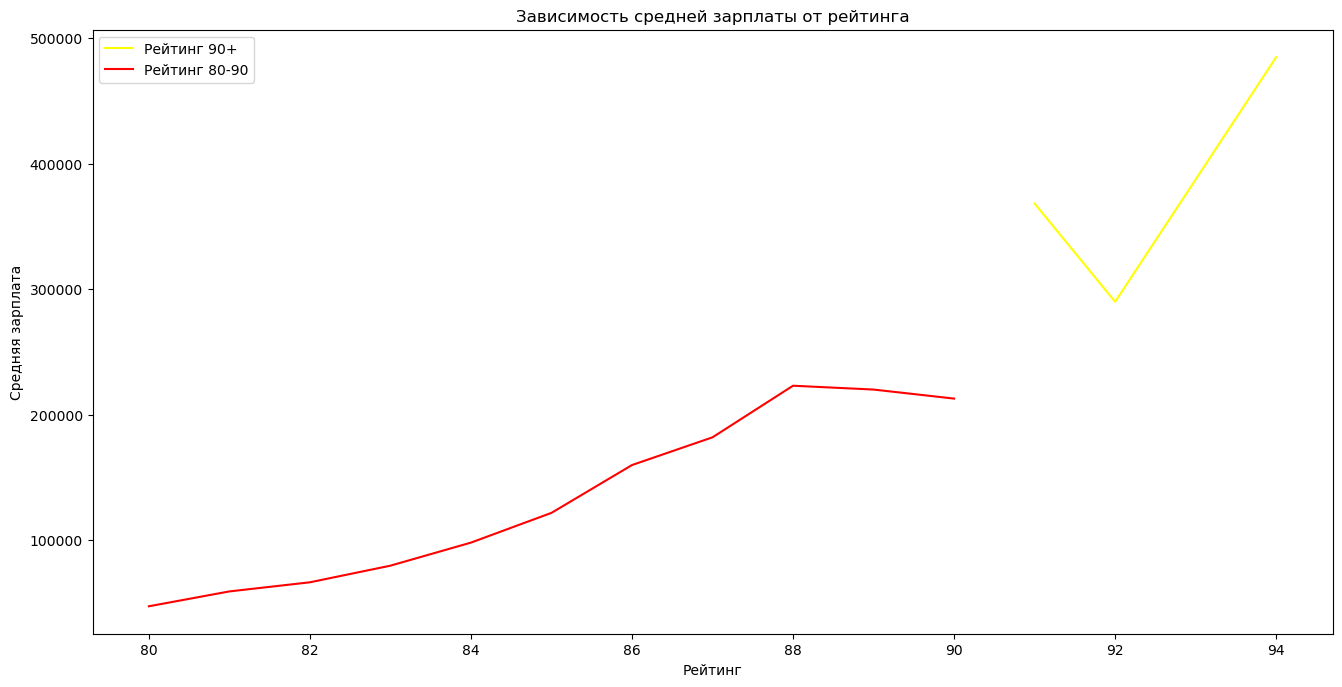

In [174]:
df['Correct wage'] = df['Wage'].apply(get_correct_value)

wage_diff = df[df['Overall'] > 90]['Correct wage'].mean() - df[(df['Overall'] >= 80) & (df['Overall'] <= 90)]['Correct wage'].mean()
print(f'Разница средней зарплаты у игроков с рейтингом 90+ и 80-90: {wage_diff:.0f}')

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df[df['Overall'] > 90].groupby('Overall')['Correct wage'].mean(), color='yellow')
plt.plot(df[(df['Overall'] >= 80) & (df['Overall'] <= 90)].groupby('Overall')['Correct wage'].mean(), color='red')
plt.title('Зависимость средней зарплаты от рейтинга')
plt.legend(['Рейтинг 90+', 'Рейтинг 80-90'])
plt.xlabel('Рейтинг')
plt.ylabel('Средняя зарплата')
plt.show()